# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

1: There is a moderate correlation between latitude and max temperatures in the Southern Hemisphere. This means that as the latitude increases, the max temperature slightly increases as well. 

2: Latitude does not influence the humidity in both the Northern and Southern Hemispheres.  Generally, humidity increases as temperatures increase, so there should be a greater correlation if a linear regression was performed for max temperatures versus humidity. 

3: Wind speed is also not greatly affected by latitude, with there being little to no correlation in both the Northern and Southern Hemispheres. A potential analysis could be run to see how coastal city wind speeds compare to cities with the same latitude that are further inland, to see if being closer to the ocean has a stronger affect on wind speed.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

In [3]:
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []

index_counter = 1
set_counter = 1

In [4]:
base_url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+ weather_api_key

print ("Beginning Data Retrieval")
print ("--------------------------")


weather_data = []
for index, city in enumerate(cities):
    
    if (index % 50 == 0 and index >= 50): 
            index_counter = 1
            set_counter += 1
     
    query_url = base_url + "&q=" + city 
    
    weather_response = requests.get(query_url)
    
    weather_json = weather_response.json()
    
    print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
    
    index_counter += 1
    
    try: 
        lat_list.append(weather_json["coord"]["lat"])
        city_list.append(city)
        lng_list.append(weather_json["coord"]["lon"])
        max_temp_list.append(weather_json["main"]["temp_max"])
        humidity_list.append(weather_json["main"]["humidity"])
        cloudiness_list.append(weather_json["clouds"]["all"])
        wind_speed_list.append(weather_json["wind"]["speed"])
        country_list.append(weather_json["sys"]["country"])
        date_list.append(weather_json["dt"])
        
    except:
        print("City not found. Skipping...")
        pass
        
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 : busselton
Processing Record 2 of Set 1 : rikitea
Processing Record 3 of Set 1 : qaanaaq
Processing Record 4 of Set 1 : taoudenni
Processing Record 5 of Set 1 : cape town
Processing Record 6 of Set 1 : starkville
Processing Record 7 of Set 1 : jamestown
Processing Record 8 of Set 1 : samusu
City not found. Skipping...
Processing Record 9 of Set 1 : kruisfontein
Processing Record 10 of Set 1 : cherskiy
Processing Record 11 of Set 1 : safranbolu
Processing Record 12 of Set 1 : bilma
Processing Record 13 of Set 1 : hermanus
Processing Record 14 of Set 1 : louisbourg
City not found. Skipping...
Processing Record 15 of Set 1 : port elizabeth
Processing Record 16 of Set 1 : albany
Processing Record 17 of Set 1 : hithadhoo
Processing Record 18 of Set 1 : evensk
Processing Record 19 of Set 1 : clyde river
Processing Record 20 of Set 1 : chernyshevskiy
Processing Record 21 of Set 1 : bluff
Processing Record 22 of 

Processing Record 34 of Set 4 : hilo
Processing Record 35 of Set 4 : beloha
Processing Record 36 of Set 4 : zinder
Processing Record 37 of Set 4 : kusti
Processing Record 38 of Set 4 : goedereede
Processing Record 39 of Set 4 : narsaq
Processing Record 40 of Set 4 : saldanha
Processing Record 41 of Set 4 : tura
Processing Record 42 of Set 4 : hoquiam
Processing Record 43 of Set 4 : portland
Processing Record 44 of Set 4 : butaritari
Processing Record 45 of Set 4 : sinnamary
Processing Record 46 of Set 4 : laguna
Processing Record 47 of Set 4 : hawkesbury
Processing Record 48 of Set 4 : port blair
Processing Record 49 of Set 4 : camana
Processing Record 50 of Set 4 : paredon
Processing Record 1 of Set 5 : saint george
Processing Record 2 of Set 5 : acarau
Processing Record 3 of Set 5 : muscle shoals
Processing Record 4 of Set 5 : belaya gora
Processing Record 5 of Set 5 : kirakira
Processing Record 6 of Set 5 : hasaki
Processing Record 7 of Set 5 : lagoa
Processing Record 8 of Set 5 : t

Processing Record 25 of Set 8 : saint-augustin
Processing Record 26 of Set 8 : amapa
Processing Record 27 of Set 8 : lolua
City not found. Skipping...
Processing Record 28 of Set 8 : longyearbyen
Processing Record 29 of Set 8 : rong kwang
Processing Record 30 of Set 8 : kajaani
Processing Record 31 of Set 8 : ca mau
Processing Record 32 of Set 8 : poplar bluff
Processing Record 33 of Set 8 : umm lajj
Processing Record 34 of Set 8 : washougal
Processing Record 35 of Set 8 : guerrero negro
Processing Record 36 of Set 8 : fort abbas
Processing Record 37 of Set 8 : geraldton
Processing Record 38 of Set 8 : ilo
Processing Record 39 of Set 8 : norman wells
Processing Record 40 of Set 8 : san jose
Processing Record 41 of Set 8 : karkaralinsk
City not found. Skipping...
Processing Record 42 of Set 8 : tidore
City not found. Skipping...
Processing Record 43 of Set 8 : maniitsoq
Processing Record 44 of Set 8 : faya
Processing Record 45 of Set 8 : altamira
Processing Record 46 of Set 8 : barcelos

Processing Record 13 of Set 12 : zyryanka
Processing Record 14 of Set 12 : makakilo city
Processing Record 15 of Set 12 : inongo
Processing Record 16 of Set 12 : rassvet
Processing Record 17 of Set 12 : manaus
Processing Record 18 of Set 12 : marquette
Processing Record 19 of Set 12 : sahuaripa
Processing Record 20 of Set 12 : okhotsk
Processing Record 21 of Set 12 : icod de los vinos
Processing Record 22 of Set 12 : christchurch
Processing Record 23 of Set 12 : honningsvag
Processing Record 24 of Set 12 : garoua
Processing Record 25 of Set 12 : trairi
Processing Record 26 of Set 12 : fortuna
Processing Record 27 of Set 12 : torrington
Processing Record 28 of Set 12 : beira
Processing Record 29 of Set 12 : banjarmasin
Processing Record 30 of Set 12 : mendi
Processing Record 31 of Set 12 : bubaque
Processing Record 32 of Set 12 : alofi
Processing Record 33 of Set 12 : ponca city
Processing Record 34 of Set 12 : dzhebariki-khaya
Processing Record 35 of Set 12 : hoima
Processing Record 36

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#export city data into csv
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list
})

In [12]:
#count dat
weather_data.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [13]:
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.65,115.33,54.00,93,0,8.88,AU,1595725903
1,rikitea,-23.12,-134.97,70.48,80,19,19.53,PF,1595725422
2,qaanaaq,77.48,-69.36,43.47,61,0,0.85,GL,1595725387
3,taoudenni,22.68,-3.98,96.87,28,0,6.73,ML,1595725971
4,cape town,-33.93,18.42,59.00,93,75,5.82,ZA,1595725767
...,...,...,...,...,...,...,...,...,...
580,baruun-urt,46.68,113.28,65.53,83,100,7.83,MN,1595726184
581,shu,43.60,73.76,75.00,68,0,3.22,KZ,1595726184
582,moyale,3.52,39.06,62.98,80,1,14.05,KE,1595726185
583,pindiga,9.98,10.93,72.25,92,100,7.27,NG,1595726185


In [14]:
weather_data.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#  Get the indices of cities that have humidity over 100%.
new_city_data = weather_dict[(weather_dict["Humidity"] > 100)].index

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
new_city_data

Int64Index([], dtype='int64')

In [17]:
# Extract relevant fields from the data frame

#export city data into csv
new_city_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list
})
# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

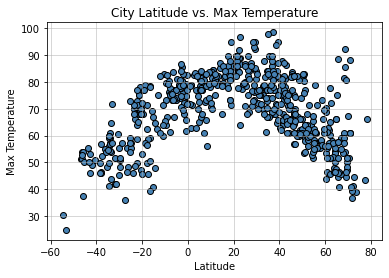

In [36]:
#Latitude vs. Temperature scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

#title
plt.title("City Latitude vs. Max Temperature") #DATE??

#x axis
plt.xlabel("Latitude")

#y axis
plt.ylabel("Max Temperature")

#grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

#save as pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

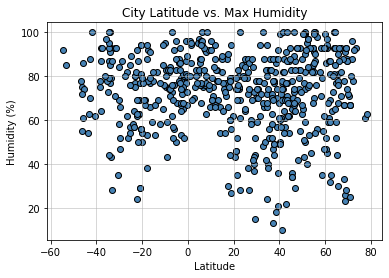

In [37]:
#Latitude vs. Temperature scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

#title
plt.title("City Latitude vs. Max Humidity") #DATE??

#x axis
plt.xlabel("Latitude")

#y axis
plt.ylabel("Humidity (%)")

#grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

#save as pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

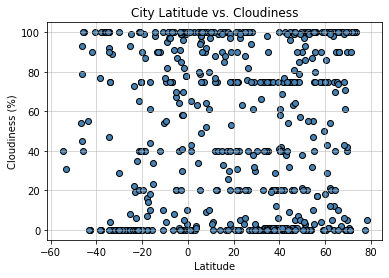

In [38]:
#Latitude vs. Temperature scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

#title
plt.title("City Latitude vs. Cloudiness") 

#x axis
plt.xlabel("Latitude")

#y axis
plt.ylabel("Cloudiness (%)")

#grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

#save as pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

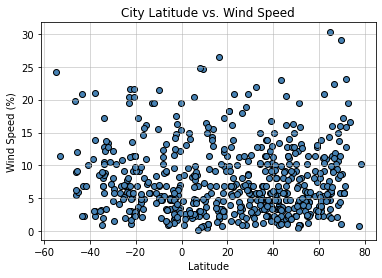

In [39]:
#Latitude vs. Temperature scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

#title
plt.title("City Latitude vs. Wind Speed") #DATE??

#x axis
plt.xlabel("Latitude")

#y axis
plt.ylabel("Wind Speed (%)")

#grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

#save as pngs
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [40]:
# OPTIONAL: Create a function to create Linear Regression plots

In [41]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] <= 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3941738571842704


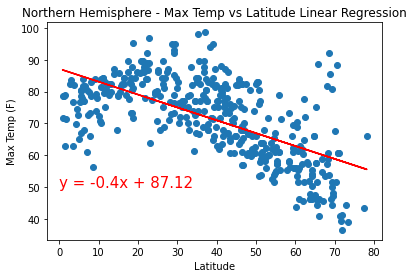

<Figure size 432x288 with 0 Axes>

In [47]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Max Temp vs Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5650965192299418


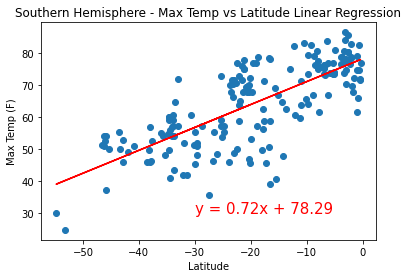

<Figure size 432x288 with 0 Axes>

In [48]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Max Temp vs Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0020197514783162705


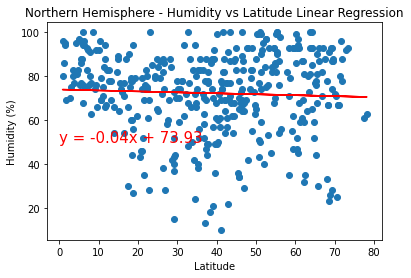

<Figure size 432x288 with 0 Axes>

In [49]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Humidity vs Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 2.828584871359107e-05


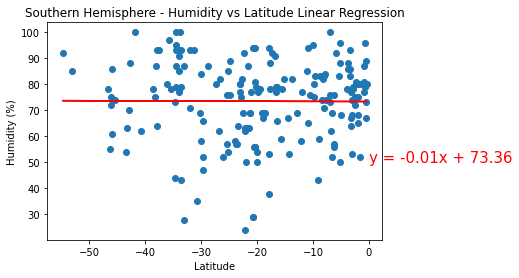

<Figure size 432x288 with 0 Axes>

In [50]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Humidity vs Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0015680807375502213


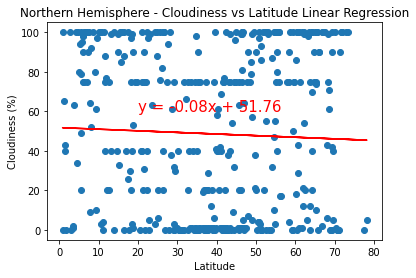

<Figure size 432x288 with 0 Axes>

In [51]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Cloudiness(%) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.025957532365608604


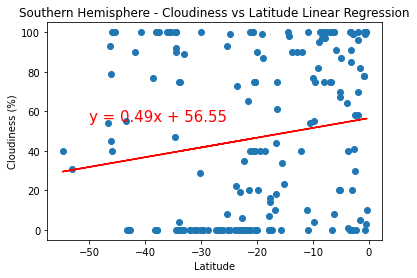

<Figure size 432x288 with 0 Axes>

In [53]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Cloudiness(%) vs Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0071468279087448525


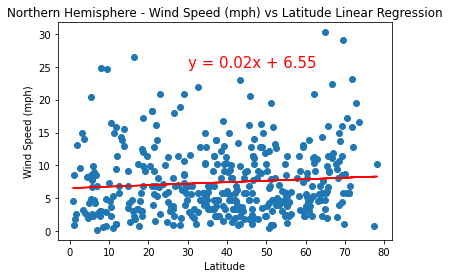

<Figure size 432x288 with 0 Axes>

In [54]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Wind Speed(mph) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.022924623686834955


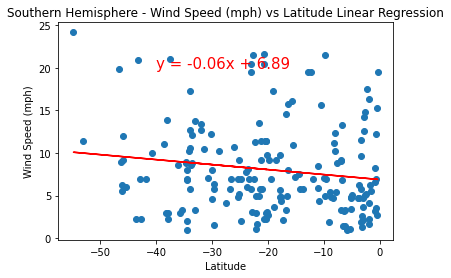

<Figure size 432x288 with 0 Axes>

In [55]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Wind Speed(mph) vs Latitude Linear Regression.png")